# TQDB API 範例 (Python版)
首先我們自定義連結TQDB取出報價資料的函數
* 預設Series作為資料輸出格式，也可以選擇DataFrame
* 資料主機的位置，我們先預設為本機IP：127.0.0.1


In [ ]:
%matplotlib inline
import math
import matplotlib.pyplot as plt
import requests
import datetime
import urllib
from  pandas import DataFrame,Series
# Define function to fetch remote data # demonstartion only #
def TQDB(symbol='WTX',startDate='2014-6-30',endDate='2015-7-01',type='Series',server='127.0.0.1'):
    querystr={'symbol':symbol, 'BEG':startDate, 'END': endDate}
    url = "http://"+server+"/cgi-bin/q1min.py?"+urllib.urlencode(querystr)
    r = requests.get(url)
    lines = r.content.split('\n')
    x = []
    H=[]
    L=[]
    C=[]
    O=[]
    i=0
    for line in lines:
        i=i+1
        items=line.split(',')
        if len(items) < 5:
            continue
        dt=datetime.datetime.strptime(items[0]+items[1], '%Y%m%d%H%M%S')
        x.append(dt)

        C.append(float(items[5]))
        L.append(float(items[4]))
        H.append(float(items[3]))
        O.append(float(items[2]))
    d = {'O' :O,'H':H,'L':L,'C':C}
    if len(O)==0:
        print "no data available. Please select different date"
        return
    if type=="DataFrame":
        return DataFrame(d,index=x, columns=['O','H','L','C'])
    elif type=="Series":
        return Series(C,index=x)
    else:
        print 'type is not defined'


In [5]:
s='2015-7-2'
e='2015-7-3'
a=TQDB("TWSE",type='Series',startDate=s,endDate=e)
b=TQDB("TXA",type='Series',startDate=s,endDate=e)
c=TQDB("WTX",type='Series',startDate=s,endDate=e)

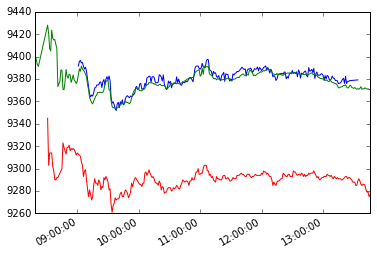

In [6]:
a.plot()#blue
b.plot()#Green
c.plot()#red

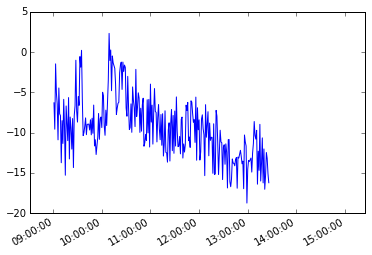

In [24]:
(a-b).plot()#blue
#b.plot()#Green

In [11]:
s='2014-5-2'
e='2015-7-3'
stw=TQDB("STW",type='Series',startDate=s,endDate=e)
#b=TQDB("TXA",type='Series',startDate=s,endDate=e)
tx=TQDB("WTX",type='Series',startDate=s,endDate=e)

In [8]:
p=1.5*30*stw-tx*2

In [10]:
p

2015-06-02 00:00:00       NaN
2015-06-02 00:02:00       NaN
2015-06-02 00:03:00       NaN
2015-06-02 00:04:00       NaN
2015-06-02 00:05:00       NaN
2015-06-02 00:07:00       NaN
2015-06-02 00:08:00       NaN
2015-06-02 00:09:00       NaN
2015-06-02 00:10:00       NaN
2015-06-02 00:11:00       NaN
2015-06-02 00:12:00       NaN
2015-06-02 00:13:00       NaN
2015-06-02 00:14:00       NaN
2015-06-02 00:16:00       NaN
2015-06-02 00:17:00       NaN
2015-06-02 00:18:00       NaN
2015-06-02 00:19:00       NaN
2015-06-02 00:20:00       NaN
2015-06-02 00:21:00       NaN
2015-06-02 00:22:00       NaN
2015-06-02 00:23:00       NaN
2015-06-02 00:24:00       NaN
2015-06-02 00:25:00       NaN
2015-06-02 00:27:00       NaN
2015-06-02 00:28:00       NaN
2015-06-02 00:30:00       NaN
2015-06-02 00:31:00       NaN
2015-06-02 00:32:00       NaN
2015-06-02 00:34:00       NaN
2015-06-02 00:37:00       NaN
                        ...  
2015-07-02 13:18:00   -2996.5
2015-07-02 13:19:00   -2996.5
2015-07-02

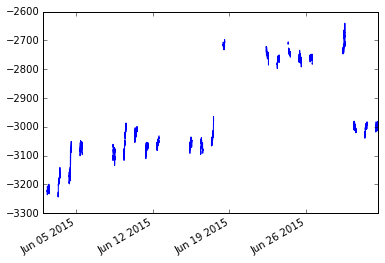

In [9]:
p.plot()